In [1]:
# make necesarry imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path  = "/content/drive/MyDrive/DSA4212/Dataset/ml-1m/"
movies = pd.read_csv(folder_path + "movies.dat", sep = '::', header = None, names = ["MovieID", "Title", "Genres"], engine='python',encoding='latin-1')
ratings = pd.read_csv(folder_path + "ratings.dat",sep='::',header=None,engine='python',names=["UserID", "MovieID", "Rating", "Timestamp"])
users = pd.read_csv(folder_path + "users.dat",sep='::',header=None,engine='python',names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

In [4]:
movie_ratings = movies.set_index("MovieID").join(ratings.set_index("MovieID"), on = 'MovieID').reset_index().dropna()

In [5]:
movie_ind = {} # movieID as key, index as val
ind_movie = {} # index as key, movieID as val
for ind, row in movies.iterrows():
    movie_ind[row.MovieID] = ind
    ind_movie[ind] = row.MovieID

mat_template = [[np.nan for _ in range(len(users))] for _ in range(len(movies))]
mat = np.asarray(mat_template)
for ind, row in movie_ratings.iterrows():
    if row.UserID>0:
        mat[int(movie_ind[row.MovieID])][int(row.UserID)-1] = row.Rating

In [6]:
# create the user-item matrix
m = pd.DataFrame(mat)
m = m.T
m

,0,1,2,3,4,5,6,7,8,9,...,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [7]:
# flatten to 1d array
flatten_m = np.asarray(m).flatten()

In [8]:
# get the mean and std of all available ratings

print("The mean rating is:", round(np.mean(flatten_m[~np.isnan(flatten_m)]),3))
print("The standard deviation is:", round(np.std(flatten_m[~np.isnan(flatten_m)]),3))

The mean rating is: 3.582
The standard deviation is: 1.117


### Data Visualization

In [9]:
# get the percentage missing for each columns (movies)

percent_missing = m.isnull().sum() * 100 / len(m)
missing_value_df = pd.DataFrame({'column_id': m.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_id,percent_missing
2789,2789,43.245033
257,257,50.480132
1178,1178,50.496689
1192,1192,52.268212
476,476,55.761589
...,...,...
3514,3514,100.000000
3513,3513,100.000000
1139,1139,100.000000
1141,1141,100.000000


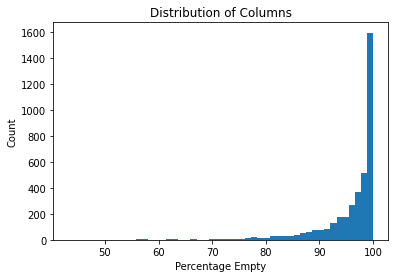

In [10]:
plt.hist(missing_value_df["percent_missing"],bins=50)
plt.title("Distribution of Columns")
plt.xlabel("Percentage Empty")
plt.ylabel("Count")
plt.show()

In [11]:
missing_value_df["percent_missing"].describe()

count    3883.000000
mean       95.735320
std         6.281309
min        43.245033
25%        94.536424
50%        98.195364
75%        99.569536
max       100.000000
Name: percent_missing, dtype: float64

In [12]:
# some movies only have 1 rating
missing_value_df[missing_value_df["percent_missing"] >= (1-1/3883)*100]

,column_id,percent_missing
2494,2494,99.983444
1538,1538,99.983444
2157,2157,99.983444
721,721,99.983444
782,782,99.983444
...,...,...
3514,3514,100.000000
3513,3513,100.000000
1139,1139,100.000000
1141,1141,100.000000


In [13]:
# get the percentage missing for each row (users)

m_transposed = m.T
percent_missing = m_transposed.isnull().sum() * 100 / len(m_transposed)
missing_value_df2 = pd.DataFrame({'column_id': m_transposed.columns,
                                 'percent_missing': percent_missing})
missing_value_df2.sort_values('percent_missing', inplace=True)
missing_value_df2

,column_id,percent_missing
4168,4168,40.406902
1679,1679,52.356425
4276,4276,55.112027
1940,1940,58.923513
1180,1180,60.829256
...,...,...
1663,1663,99.484934
2818,2818,99.484934
702,702,99.484934
1451,1451,99.484934


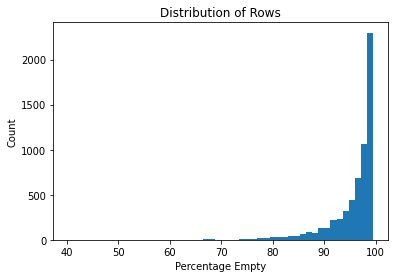

In [14]:
plt.hist(missing_value_df2["percent_missing"],bins=50)
plt.title("Distribution of Rows")
plt.xlabel("Percentage Empty")
plt.ylabel("Count")
plt.show()

In [15]:
missing_value_df2["percent_missing"].describe()

count    6040.000000
mean       95.735320
std         4.963869
min        40.406902
25%        94.643317
50%        97.527685
75%        98.866856
max        99.484934
Name: percent_missing, dtype: float64